# importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


In [2]:
data=pd.read_csv("weather.csv")          #Loading dataset
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data.shape


(96453, 12)

# Checking for null values any

In [4]:
data.isnull().any()  #checking for null values in all columns

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [5]:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [6]:
data.loc[data['Precip Type'].isnull(),'Precip Type']='rain'     #replacing null value in column with rain

In [7]:
data.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

# Defining Numericals to Categorical values

In [8]:
data.loc[data['Precip Type']=='rain','Precip Type']=1
data.loc[data['Precip Type']=='snow','Precip Type']=0
data.drop(['Summary', 'Daily Summary','Formatted Date'], axis=1, inplace=True)

In [9]:
X=data.drop(['Temperature (C)'],axis=1)       #taking X and y values which is dependent and independent features
y=data['Temperature (C)']


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)  #splitting training and testing data
 

# Performing exploratory data analysis and checking for error rate


In [11]:

model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(np.mean((pred-y_test)**2))   #calculating error using linear regression
pd.DataFrame({'actualvalue':y_test,
              'predictedvalue':pred,
              'difference':(y_test-pred)})

0.9066791244074258


,actualvalue,predictedvalue,difference
9597,18.938889,18.575545,0.363344
26204,24.122222,23.646102,0.476120
6282,20.088889,20.117179,-0.028290
92330,14.466667,15.023076,-0.556410
51067,9.716667,9.465212,0.251454
...,...,...,...
18438,19.838889,21.827614,-1.988725
10409,-2.611111,-2.368416,-0.242695
72552,5.650000,4.859898,0.790102
28211,13.888889,15.620467,-1.731578


In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)            #calculating error using polynomial
tran=poly.fit_transform(X_train)
poly.fit(tran,y_train)
model=LinearRegression()
model.fit(tran,y_train)
pred=model.predict(poly.fit_transform(X_test))
print(np.mean((pred-y_test)**2))
pd.DataFrame({'actualvalue':y_test,
              'predictedvalue':pred,
              'difference':(y_test-pred)})

0.09899537402560166


,actualvalue,predictedvalue,difference
9597,18.938889,18.898750,0.040139
26204,24.122222,24.216807,-0.094585
6282,20.088889,19.930233,0.158656
92330,14.466667,14.463173,0.003494
51067,9.716667,9.163467,0.553200
...,...,...,...
18438,19.838889,19.588808,0.250080
10409,-2.611111,-2.802999,0.191888
72552,5.650000,5.578796,0.071204
28211,13.888889,14.107278,-0.218389


# Performing data analysis using RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
reg1=RandomForestRegressor(max_depth=50,random_state=42,n_estimators=100)
reg1.fit(X_train,y_train)
pred1=reg1.predict(X_test)
print(np.mean(pred1-y_test)**2)            #calculating error rate using mean value of predicted minus test value 
pd.DataFrame({'actualvalue':y_test,
              'predictedvalue':pred1,
              'difference':(y_test-pred1)})


1.3452520605780615e-06


,actualvalue,predictedvalue,difference
9597,18.938889,18.938889,1.776357e-14
26204,24.122222,24.121722,5.000000e-04
6282,20.088889,20.088889,-2.486900e-14
92330,14.466667,14.466667,-1.598721e-14
51067,9.716667,9.692278,2.438889e-02
...,...,...,...
18438,19.838889,19.838889,-2.842171e-14
10409,-2.611111,-2.584389,-2.672222e-02
72552,5.650000,5.640556,9.444444e-03
28211,13.888889,13.888889,3.552714e-15


# Checking accuracy score 

In [14]:
accuracy = reg1.score(X_train,y_train)  #As randomforest yields lesser errorrate using it as our model
print(accuracy)


0.9999963149222082


In [15]:
accuracy = reg1.score(X_test,y_test)
print(accuracy)


0.9999704740933251


In [16]:
from sklearn.metrics import mean_squared_error
print("mean squared error",mean_squared_error(y_test,pred1))


mean squared error 0.0027082461401754013


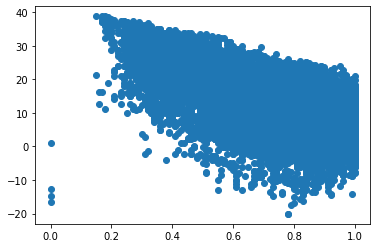

In [17]:
plt.scatter(X_test['Humidity'],pred1)


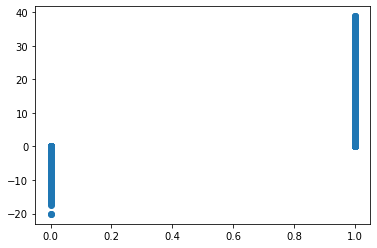

In [18]:
plt.scatter(X_test['Precip Type'],pred1)

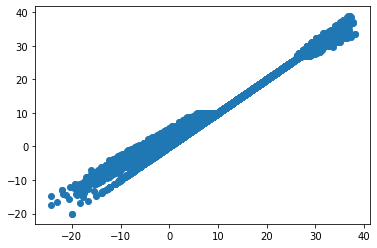

In [19]:
plt.scatter(X_test['Apparent Temperature (C)'],pred1)